# Drawing Conclusions Quiz
Use the space below to explore the `store_data.csv` dataset to answer the quiz questions below.
  * Which store has the highest total sales for the final month of data?
  * Which store makes the most sales on average?
  * Which store sells the most during the week of March 13th, 2016?
  * In what week does store C make its worst sales?
  * Which store has the most sales in the latest 3-month period?


In [1]:
# imports and load data
import pandas as pd

df = pd.read_csv('store_data.csv')
df.head()

,week,storeA,storeB,storeC,storeD,storeE
0,2014-05-04,2643,8257,3893,6231,1294
1,2014-05-11,6444,5736,5634,7092,2907
2,2014-05-18,9646,2552,4253,5447,4736
3,2014-05-25,5960,10740,8264,6063,949
4,2014-06-01,7412,7374,3208,3985,3023


array([[<AxesSubplot: title={'center': 'storeA'}>,
        <AxesSubplot: title={'center': 'storeB'}>],
       [<AxesSubplot: title={'center': 'storeC'}>,
        <AxesSubplot: title={'center': 'storeD'}>],
       [<AxesSubplot: title={'center': 'storeE'}>, <AxesSubplot: >]],
      dtype=object)

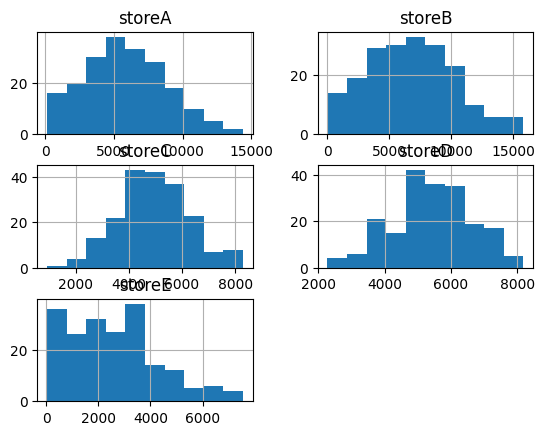

In [9]:
# explore data by creating histograms on the entire DataFrame
df.hist()

In [11]:
# Use tail to find the end of the dataset to locate where the last month is via its index
df.tail()

,week,storeA,storeB,storeC,storeD,storeE
195,2018-01-28,282,6351,7759,5558,1028
196,2018-02-04,4853,6503,4187,5956,1458
197,2018-02-11,9202,3677,4540,6186,243
198,2018-02-18,3512,7511,4151,5596,3501
199,2018-02-25,7560,6904,3569,5045,2585


In [17]:
# Use iloc to create a slice of the last month and sum up the weeks
# to find the total sales for the last month
df['week'] = pd.to_datetime(df['week'])

# Sort the DataFrame by the 'week' column in ascending order
df = df.sort_values('week')

# Get the last month's slice
last_month_slice = df.loc[df['week'].dt.month == df['week'].dt.month.max()]

# Sum up the weeks to find the total sales for the last month
total_sales_last_month = last_month_slice['storeE'].sum()

print("Total sales for the last month:", total_sales_last_month)

Total sales for the last month: 37272


In [19]:
# Use the mean method to find the average sales for each store
df[['storeA', 'storeB', 'storeC', 'storeD', 'storeE']].mean()

storeA    5865.480
storeB    6756.710
storeC    4942.105
storeD    5431.405
storeE    2580.025
dtype: float64

In [20]:
# Find the sales of all stores by filtering on the week of march 13, 2016
df['week'] = pd.to_datetime(df['week'])

# Filter the DataFrame for the week of March 13, 2016
filtered_df = df[df['week'] == '2016-03-13']

# Get the sales of all stores for the filtered week
sales_by_store = filtered_df[['storeA', 'storeB', 'storeC', 'storeD', 'storeE']]

# Print the sales of all stores for the filtered week
print(sales_by_store)

    storeA  storeB  storeC  storeD  storeE
97    2054    1390    5112    5513    2536


In [21]:
# Use the min method to filter the dataset to find the worst week for store C
df[df['storeC'] == df['storeC'].min()]

,week,storeA,storeB,storeC,storeD,storeE
9,2014-07-06,8567,3228,927,3277,168


In [22]:
# Filter the DataFrame on the most recent 3 month period. You can filter by selecting
# greater than or equal to 2017-12-01

df['week'] = pd.to_datetime(df['week'])

# Filter the DataFrame for the most recent 3-month period
last_three_months = df[df['week'] >= '2017-12-01']

# Find the total sales during the last three months
total_sales_last_three_months = last_three_months.iloc[:, 1:].sum()

# Print the total sales during the last three months
print(total_sales_last_three_months)

storeA    87591
storeB    79394
storeC    66538
storeD    75190
storeE    27334
dtype: int64
